## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

### Reading Train and Test data

In [2]:
data_train = pd.read_csv('adult_train.csv')

data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
data_test = pd.read_csv('adult_test.csv')
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [4]:
len(data_test)

16282

In [5]:
data_test.dropna(subset = ['Target'], inplace=True)

In [6]:
len(data_test)

16281

In [7]:
data_test.isnull().sum()

Age                 0
Workclass         963
fnlwgt              0
Education           0
Education_Num       0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           274
Target              0
dtype: int64

In [8]:
data_test['Target'] = data_test['Target'].str.replace('<=50K.','0')#.replace('>50K.','1')
data_test['Target'] = data_test['Target'].str.replace('>50K.','1')

In [9]:
data_test.head()


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,0


In [10]:
data_train['Target'] = data_train['Target'].str.replace('<=50K','0')#.replace('>50K.','1')
data_train['Target'] = data_train['Target'].str.replace('>50K','1')

In [11]:
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


### Find the statistics of the test data and count the distribution of target variable in train data 

In [12]:
data_test.describe()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


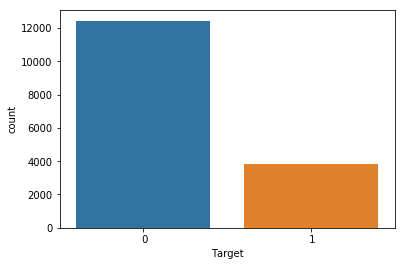

In [13]:
#data_test['Target'].dtype
sns.countplot(data_test['Target'])

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education_Num     32561 non-null int64
Martial_Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
cols_con = data_train.select_dtypes(include='int64')
cols_non_con = data_train.select_dtypes(include='object').drop(['Target'],1)

In [16]:
cols_non_con.head()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [17]:
cols_con.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [18]:
list_non_con = cols_non_con.columns

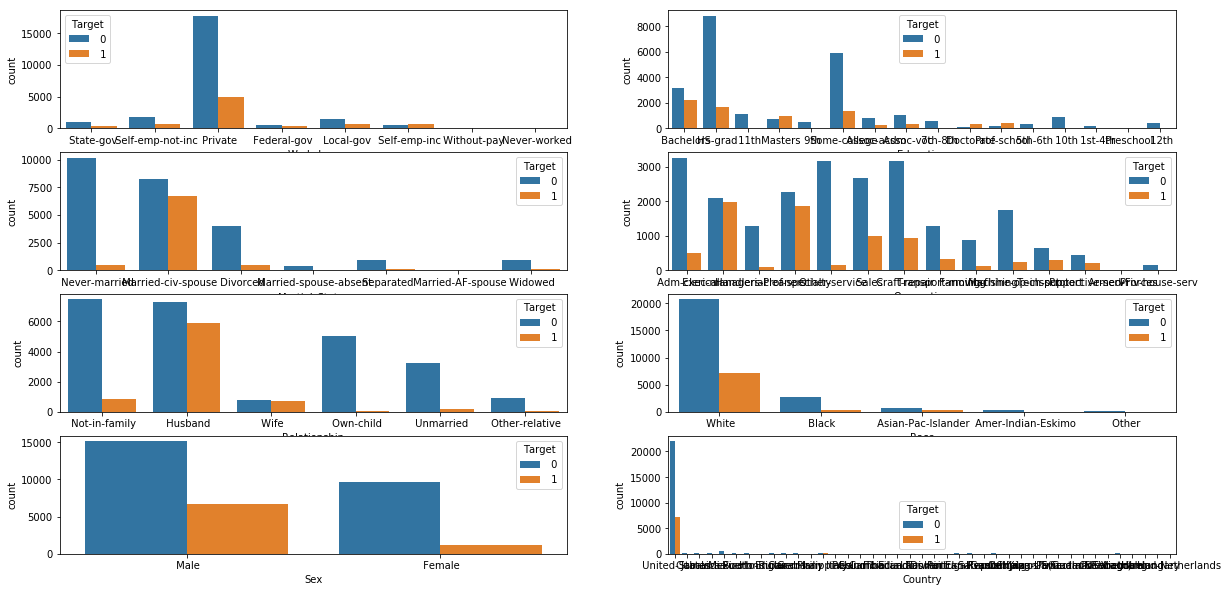

In [19]:
fig, axes = plt.subplots(4,2,figsize = (20,10))
for i in range(4): 
    for j in range(2):
        col = list_non_con[i*2+j]
        sns.countplot(x = cols_non_con[col],hue= data_train['Target'],ax=axes[i,j])

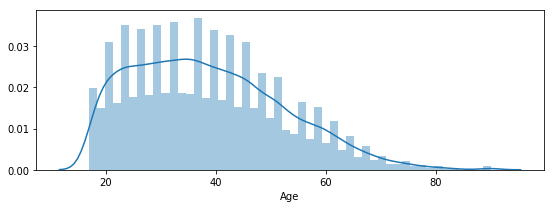

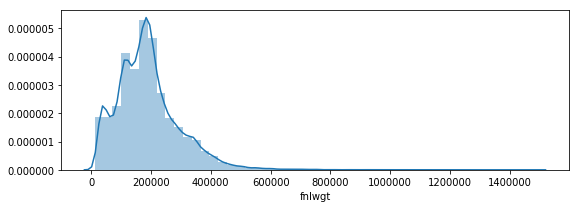

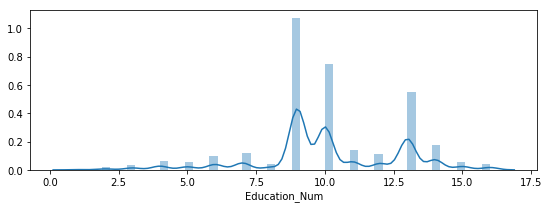

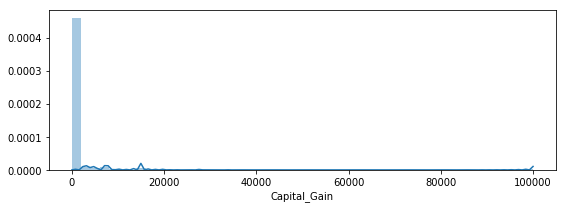

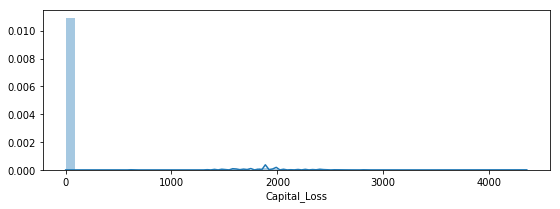

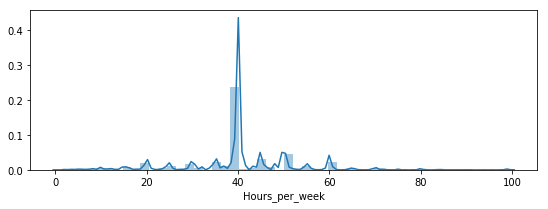

In [20]:
n = 1
for i in cols_con.columns:
    plt.figure(figsize=(20,10))
    plt.subplot(3,2,n)
    sns.distplot(cols_con[i])
    n +=1

### Calculate the percentage of adults from each country in the data *

In [21]:
data_train.groupby(['Country'])['Country'].value_counts()/data_train['Country'].count()*100#.value_counts().sum()

Country                      Country                    
 Cambodia                     Cambodia                       0.059416
 Canada                       Canada                         0.378385
 China                        China                          0.234536
 Columbia                     Columbia                       0.184502
 Cuba                         Cuba                           0.297079
 Dominican-Republic           Dominican-Republic             0.218900
 Ecuador                      Ecuador                        0.087560
 El-Salvador                  El-Salvador                    0.331478
 England                      England                        0.281443
 France                       France                         0.090687
 Germany                      Germany                        0.428420
 Greece                       Greece                         0.090687
 Guatemala                    Guatemala                      0.200138
 Haiti                        Hai

In [22]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check the data types of train and test data *

In [23]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target            object
dtype: object

In [24]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target             object
dtype: object

### As we have seen in the earlier task, the data type of age in the test data is object type, so we will have to convert the data type of `Age` column in the test data to `int` type. 

In [25]:
data_test['Age'] = data_test['Age'].astype('int')

In [26]:
data_test['Age'].dtype

dtype('int32')

### Also cast all float features to int type to keep types consistent between our train and test data.

In [27]:
for f in data_test.select_dtypes('float').columns:
    data_test[f] = data_test[f].astype('int') 

In [28]:
data_test.dtypes

Age                int32
Workclass         object
fnlwgt             int32
Education         object
Education_Num      int32
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int32
Capital_Loss       int32
Hours_per_week     int32
Country           object
Target            object
dtype: object

### We have to treat categorical and numerical data in different ways for cleaning the data and encoding, so we will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [29]:
cols_con.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [30]:
cols_non_con.head()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [31]:
cols_con_test = data_test.select_dtypes('int','float')
cols_non_con_test = data_test.select_dtypes('object').drop('Target',1)

In [32]:
cols_con_test.head()

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week
1,25,226802,7,0,0,40
2,38,89814,9,0,0,50
3,28,336951,12,0,0,40
4,44,160323,10,7688,0,40
5,18,103497,10,0,0,30


In [33]:
cols_non_con_test.head()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
1,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
2,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
3,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
5,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States


### As we have already separated the numerical and categorical columns, we will fill in missing data for continuous features with their median values, for categorical features with their mode

In [38]:
cols_non_con.isnull().sum()

Workclass         1836
Education            0
Martial_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Country            583
dtype: int64

In [39]:
cols_non_con_test.isnull().sum()

Workclass         963
Education           0
Martial_Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Country           274
dtype: int64

In [34]:
# mode_w = cols_non_con['Workclass'].mode()
# mode_o = cols_non_con['Occupation'].mode()
# mode_c = cols_non_con['Country'].mode()#Workclass Occupation Country

In [41]:
# cols_non_con['Workclass'].fillna(value = mode_w).isnull().sum()
# #cols_non_con['Workclass'].isnull().sum()
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols_non_con['Workclass'] = imp.fit_transform(cols_non_con[['Workclass']])
cols_non_con['Occupation'] = imp.fit_transform(cols_non_con[['Occupation']])
cols_non_con['Country'] = imp.fit_transform(cols_non_con[['Country']])

In [42]:
# print(cols_non_con['Workclass'].isnull().sum())
# print(cols_non_con['Occupation'].isnull().sum())
# print(cols_non_con['Country'].isnull().sum())
cols_non_con.isnull().sum()

Workclass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Country           0
dtype: int64

In [37]:
# mode_w_test = cols_non_con_test['Workclass'].mode()
# mode_o_test = cols_non_con_test['Occupation'].mode()
# mode_c_test = cols_non_con_test['Country'].mode()#Workclass Occupation Country

In [43]:
# cols_non_con['Workclass'].fillna(value = mode_w).isnull().sum()
# #cols_non_con['Workclass'].isnull().sum()

imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols_non_con_test['Workclass'] = imp1.fit_transform(cols_non_con_test[['Workclass']])
cols_non_con_test['Occupation'] = imp1.fit_transform(cols_non_con_test[['Occupation']])
cols_non_con_test['Country'] = imp1.fit_transform(cols_non_con_test[['Country']])

In [44]:
cols_non_con_test.isnull().sum()

Workclass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Country           0
dtype: int64

### Machines only understand numbers, so we will have to represent the categorical variables in a way so that the computer understands it, so we will first label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for l in cols_non_con.columns:
    cols_non_con[l] = label_encoder.fit_transform(cols_non_con[l])


In [46]:
for k in cols_non_con_test.columns:
    cols_non_con_test[k] = label_encoder.fit_transform(cols_non_con_test[k])

In [47]:
cols_non_con.head()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
0,6,9,4,0,1,4,1,38
1,5,9,2,3,0,4,1,38
2,3,11,0,5,1,4,1,38
3,3,1,2,5,0,2,1,38
4,3,9,2,9,5,2,0,4


In [48]:
cols_non_con_test.head()

,Workclass,Education,Martial_Status,Occupation,Relationship,Race,Sex,Country
1,3,1,4,6,3,2,1,37
2,3,11,2,4,0,4,1,37
3,1,7,2,10,0,4,1,37
4,3,15,2,6,0,2,1,37
5,3,15,4,9,3,4,0,37


In [43]:
cols_non_con_test.isnull().sum()

Workclass         0
Education         0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Country           0
dtype: int64

### Split train and test data into X_train ,y_train,X_test and y_test data

In [49]:
test_df = pd.concat([cols_con_test,cols_non_con_test],1)

In [50]:
X_train = pd.concat([cols_con,cols_non_con],1)
X_test = test_df#.drop('Target',1)
y_train = data_train['Target']
y_test = data_test['Target']

In [51]:
len(X_test),len(y_test),len(X_train),len(y_train)

(16281, 16281, 32561, 32561)

In [52]:
y_test.dtype,y_train.dtype

(dtype('O'), dtype('O'))

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [53]:
dt2 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state = 17)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [54]:
dt2.score(X_test,y_test)

0.839199066396413

### We see that the accuracy we got is 84% without using parameter tuning Now lets see if we can increase our model accuracy by using Decision tree with parameter tuning
* Create a dictionary with Key as `'max_depth'` and value as `range(2,11)` and save it as tree_params.
* Train a decision tree (DecisionTreeClassifier(random_state = 17),tree_params). Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [55]:
tree_params = {'max_depth': np.arange(2,11)}#, 'min_samples_leaf': range(10,50,10)}
model_2 = DecisionTreeClassifier(random_state = 17)
p_tree = GridSearchCV(estimator=model_2, param_grid=tree_params,cv=5)
p_tree.fit(X_train,y_train)
acc_2 = p_tree.score(X_test,y_test)
acc_2

0.8544929672624532

### Print out optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

In [56]:
p_tree.best_params_,p_tree.best_score_,p_tree.best_estimator_

({'max_depth': 8},
 0.8547341912103437,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=17, splitter='best'))

### Train a decision tree with maximum depth of 9 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

In [57]:
dt3 = DecisionTreeClassifier(max_depth=8,random_state = 17)
dt3.fit(X_train,y_train)
dt3.score(X_test,y_test)

0.8544929672624532

In [58]:
np.sort(dt3.feature_importances_)

array([0.00000000e+00, 2.70561061e-04, 8.49445128e-04, 1.21354867e-03,
       1.30070158e-03, 1.54509289e-03, 5.18763179e-03, 6.66369324e-03,
       3.65921283e-02, 4.65115727e-02, 6.36664381e-02, 2.14939769e-01,
       2.16363290e-01, 4.04896127e-01])

In [59]:
dt3.classes_,dt3.max_features_

(array([' 0', ' 1'], dtype=object), 14)